# Multimedia Security and Privacy
# TP 1
Tientso Ning

In [167]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

# 1. Introduction

(792, 1056, 3)


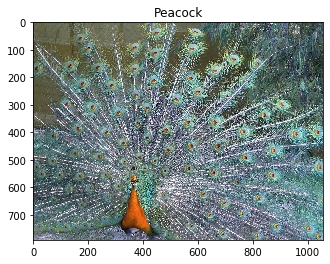

In [2]:
#read the image peacock.jpg
peacock = cv2.imread("./peacock.jpg")
plt.imshow(peacock)
plt.title("Peacock")
print(peacock.shape)

Text(0.5, 1.0, 'Histogram of Peacock')

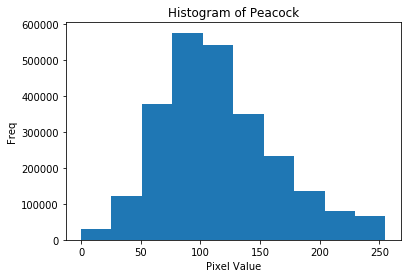

In [3]:
plt.hist(peacock.ravel())
plt.xlabel("Pixel Value")
plt.ylabel("Freq")
plt.title("Histogram of Peacock")

Text(0.5, 1.0, 'Peacock, but in Grey')

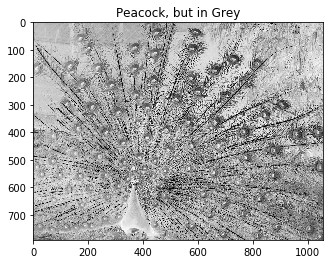

In [4]:
#convert the image to greyscale
peacockGRAY = cv2.cvtColor(peacock, cv2.COLOR_BGR2GRAY)
plt.imshow(peacockGRAY, cmap="Greys")
plt.title("Peacock, but in Grey")

In [5]:
#determine the global mean and global variance of the peacock
globmean = np.mean(peacockGRAY)
globvar = np.var(peacockGRAY)
print(globmean)
print(globvar)

118.77675667661462
2138.1369450172783


In [68]:
#cheat to find the local mean and variance
print(peacockGRAY.shape)
print(np.gcd(792, 1056))
#we can use block sizes of 33x33
window_size = (4,4)
print(tuple(np.array(peacockGRAY.shape) / window_size) + window_size)
peacockGRAYBLOCK = np.reshape(peacockGRAY, (198,4,264,4))

(792, 1056)
264
(198.0, 264.0, 4, 4)


Text(0.5, 1.0, 'Local Mean of Peacock')

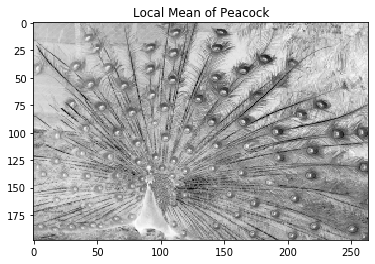

In [69]:
plt.imshow(np.mean(peacockGRAYBLOCK, axis=(1,3)), cmap = "Greys", aspect="auto")
plt.title("Local Mean of Peacock")

Text(0.5, 1.0, 'Local Variance of Peacock')

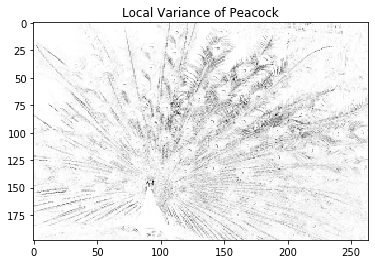

In [89]:
plt.imshow(np.var(peacockGRAYBLOCK, axis=(1,3)), cmap = "Greys", aspect="auto")
plt.title("Local Variance of Peacock")

# Comment on why we use distinct non-overlapping blocks
## Besides the obvious answer of it would be harder in python

# 2. Noise

In [73]:
#generate an array of size NxM with Gaussian noise
def AWGN (N, M):
    '''
    Create an array of size N x M with Gaussian Noise
    '''
    return np.random.randn(N,M)

In [125]:
def SnPN (img, p, q):
    '''
    Takes an image and adds salt & pepper noise according to parameters p,q.
    '''
    assert p + q <= 1 #need valid p,q values
    
    for i in range(0, len(img)):
        roll = np.random.random() #"I'll roll you for it!"
        
        if roll < p:
            img[i] = 0
        elif roll < q:
            img[i] = 255
        else:
            continue
    return img

In [174]:
def MSE (x, y):
    '''
    Determines the Mean Squared Error between images x and y
    '''
    assert x.shape == y.shape #same size or go home
    
    x = x.astype(float) #convert type
    
    z = (y-x)**2
    return np.mean(z)

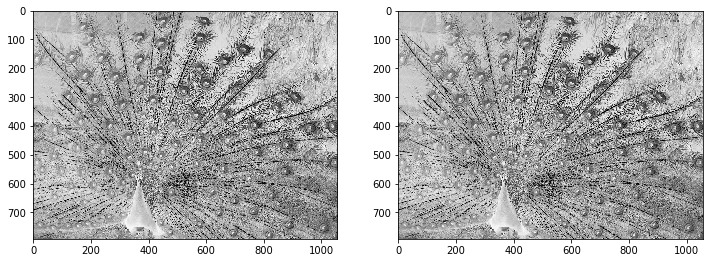

In [175]:
#read in a new copy of peacock
peacock_NEW = cv2.imread("./peacock.jpg", 0) #peacock but NEW
peacock_NEW_db = cv2.normalize(peacock_NEW.astype(float), None, 0.0, 1.0, cv2.NORM_MINMAX) #peacock but double
f, ax = plt.subplots(1,2, figsize=(12,24))
ax[0].imshow(peacock_NEW, cmap="Greys")
ax[1].imshow(peacock_NEW_db, cmap="Greys")

In [176]:
MSE(peacock_NEW, peacock_NEW_db) #"same" image but very high MSE!!

16128.447786022514

# Explain the MSE

In [182]:
def PSNR (x, y, a):
    z = (a**2)/MSE(x,y)
    return 10*math.log(z)

In [184]:
PSNR(peacock_NEW, peacock_NEW_db, 255)

13.941871553208593

In [ ]:
#we are PSNR set to 10,20,30,40, in order to find variance, which is MSE
